In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

---

In [2]:
def read_data_file():

    name_list = []
    params_list = []

    data_filename = "misc/arch_weights.txt"
    data_file = open(data_filename, 'r')

    for line in data_file.readlines():

        tkns = line.split()
        name = tkns[0]
        params = int(tkns[1])

        name_list.append(name)
        params_list.append(params)

    data_file.close()

    return name_list, params_list

In [3]:
name_list, params_list = read_data_file()

resnet_list = [(name, params) for name, params in zip(name_list, params_list) if name[:3] == "RES"]
effnet_list = [(name, params) for name, params in zip(name_list, params_list) if name[:3] == "EFF"]
convnext_list = [(name, params) for name, params in zip(name_list, params_list) if name[:3] == "CON"]

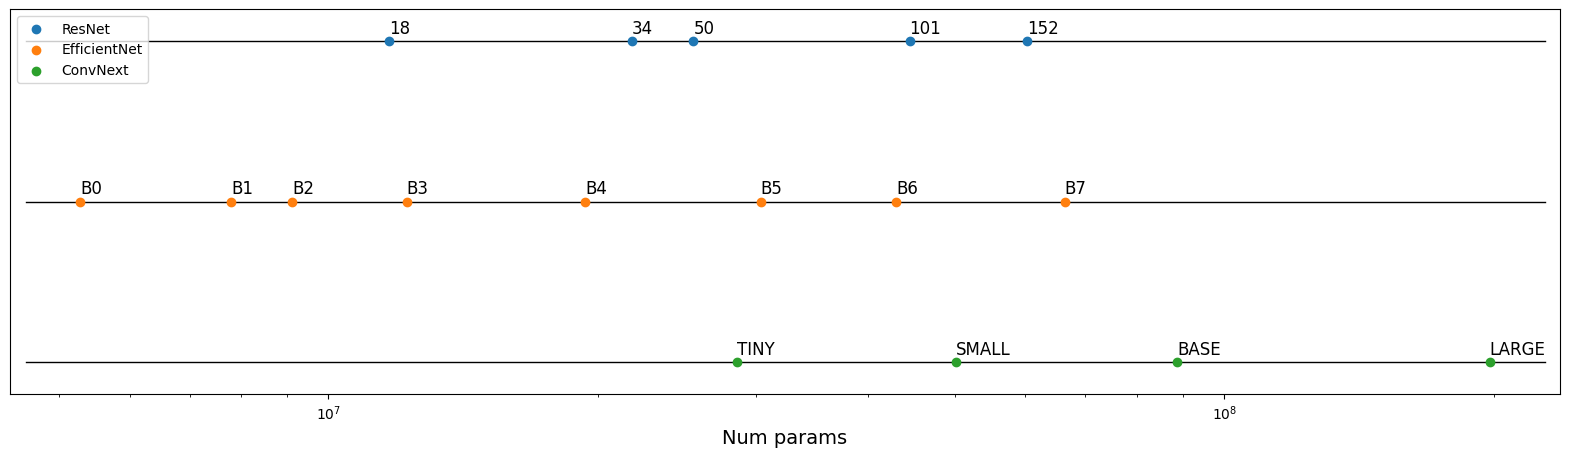

In [4]:
plt.figure(figsize=(20, 5))

plt.gca().get_yaxis().set_visible(False)
plt.xscale("log")

plt.ylim(-2.20, .20)

plt.axhline(0, xmin=0.01, xmax=0.99, color='black', linestyle='-', linewidth=1, zorder=0)
plt.axhline(-1, xmin=0.01, xmax=0.99, color='black', linestyle='-', linewidth=1, zorder=0)
plt.axhline(-2, xmin=0.01, xmax=0.99, color='black', linestyle='-', linewidth=1, zorder=0)

plt.scatter([params for name, params in resnet_list], [0] * len(resnet_list), label="ResNet")
plt.scatter([params for name, params in effnet_list], [-1] * len(effnet_list), label="EfficientNet")
plt.scatter([params for name, params in convnext_list], [-2] * len(convnext_list), label="ConvNext")

for name, params in resnet_list:
    label = name[6:]
    plt.text(params, -0 + 0.05, s=label, fontsize=12)

for name, params in effnet_list:
    label = name[13:]
    plt.text(params, -1 + 0.05, s=label, fontsize=12)

for name, params in convnext_list:
    label = name[9:]
    plt.text(params, -2 + 0.05, s=label, fontsize=12)

plt.legend(loc=2)

plt.xlabel("Num params", fontsize=14)

plt.show()

In [5]:
df = pd.DataFrame(list(zip(name_list, params_list)), columns=["Network Name", "Number of Params"])
df["Number of Params"] = (df["Number of Params"] / 1000000).map('{:.2f}M'.format)

In [6]:
df

,Network Name,Number of Params
0,RESNET18,11.69M
1,RESNET34,21.80M
2,RESNET50,25.56M
3,RESNET101,44.55M
4,RESNET152,60.19M
5,EFFICIENTNET_B0,5.29M
6,EFFICIENTNET_B1,7.79M
7,EFFICIENTNET_B2,9.11M
8,EFFICIENTNET_B3,12.23M
9,EFFICIENTNET_B4,19.34M
